In [1]:
# Import and GPU Support
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import time

from B_data import create_residual_data, create_IC_data, initial_u,exact_u, create_BC_data, create_RH_data,exact_u_err,Move_Time_1D
from B_Plotting import Burgers_plot, loss_plot 

# Full PINN
from B_PINN import NN
from B_PINN_train import pinn_train

# Burgers GPT-PINN
from B_GPT_activation import P
from B_GPT_PINN import GPT
from B_GPT_train import gpt_train

torch.set_default_dtype(torch.float)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Current Device: {device}")
if torch.cuda.is_available():
    print(f"Current Device Name: {torch.cuda.get_device_name()}")

Current Device: cuda
Current Device Name: NVIDIA A100-SXM4-40GB


In [2]:
# Training Parameter Set
nu_training = np.linspace(0.5,1,21)
number_of_neurons = 1
largest_loss_list = np.ones(number_of_neurons)
print(f"Expected Final GPT-PINN Depth: {[2,number_of_neurons,1]}\n")
P_list = np.ones(number_of_neurons, dtype=object)
nu_pinn_train   = 1.0    

Expected Final GPT-PINN Depth: [2, 1, 1]



In [3]:
# Domain and Data
Xi, Xf         = -1.0, 1.0
Ti, Tf         =  0.0, 1.0
Nx_train, Nt_train =  101, 201
Nx_test, Nt_test = 101, 201
IC_pts, IC_simple = 100, 100
BC_pts =  100
N_RH = IC_pts
dx = 0.001
dt = 0.0002

residual_data = create_residual_data(Xi, Xf, Ti, Tf, Nx_train, Nt_train, Nx_test, Nt_test, dx,dt)
xt_resid      = residual_data[0].to(device)
f_hat         = residual_data[1].to(device)
xt_test       = residual_data[2].to(device)
xt_RHL      = residual_data[3].to(device)
xt_RHR      = residual_data[4].to(device)
xt_RHt         = residual_data[5].to(device)
xt_RHtL       = residual_data[6].to(device)


BC_data = create_BC_data(Xi, Xf, Ti, Tf, BC_pts)
BC1     = BC_data[0].to(device)
BC2     = BC_data[1].to(device)

#xt_RH_data = create_RH_data(Xi, Xf, Ti, Tf, IC_pts, N_RH,dx)
#xt_RH = xt_RH_data[0].to(device)
#xt_RHL = xt_RH_data[1].to(device)

In [4]:
# Setting PINN and VGPT-PINN
#layers_pinn = np.array([2, 30, 30, 30, 30, 30, 1])
#layers_pinn = np.array([2, 30, 30, 30, 30, 30, 1])
layers_pinn = np.array([2, 20,20,20,20, 1])

lr_gpt          = 0.01
epochs_gpt      = 4000
tol_gpt         = 1e-4

###############################################################################
################################ Training Loop ################################
###############################################################################

In [5]:
import pickle
P_name=f"IFNN_rare.pkl"
#P_name=f"IFNN_rare_wc_0308.pkl"
with open(P_name, 'rb') as f:
    P_list = pickle.load(f)

0.5 stopped at epoch: 0 | gpt_loss: 3.84344220161438,rMAE: [0.7208059430122375], rRMSE:[0.8365827202796936], 0.09375022351741791, 0.12501171231269836, 0.24995745718479156, 0.0
0.5 stopped at epoch: 200 | gpt_loss: 0.023412935435771942,rMAE: 0.1268400251865387, rRMSE:0.16636121273040771, 0.007238778285682201, 0.0016100918874144554, 7.323739282583119e-06, 0.0
0.5 stopped at epoch: 400 | gpt_loss: 0.004961266648024321,rMAE: 0.06403850018978119, rRMSE:0.09812057763338089, 0.0048875040374696255, 4.470973635761766e-06, 2.905269411712652e-06, 0.0
0.5 stopped at epoch: 600 | gpt_loss: 0.004496083594858646,rMAE: 0.051989201456308365, rRMSE:0.08233452588319778, 0.004430245142430067, 3.909414317604387e-06, 2.6744332899397705e-06, 0.0
0.5 stopped at epoch: 800 | gpt_loss: 0.004015684127807617,rMAE: 0.03938085585832596, rRMSE:0.06435194611549377, 0.003956020809710026, 3.498109435895458e-06, 2.468229467922356e-06, 0.0
0.5 stopped at epoch: 1000 | gpt_loss: 0.0036767572164535522,rMAE: 0.0268600583076

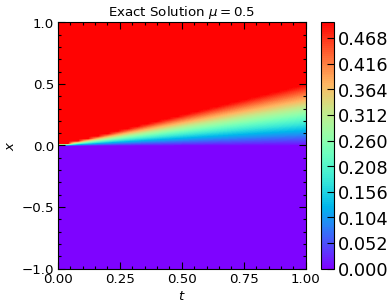

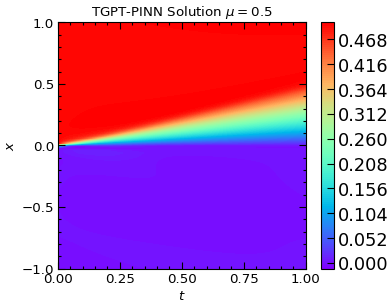

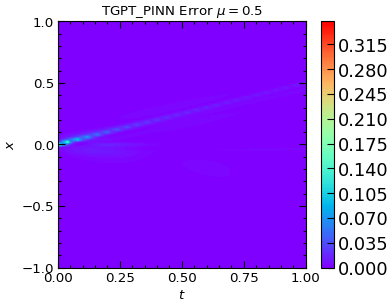

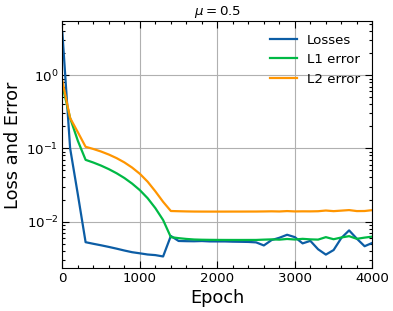

GPT-PINN at 0.5 with the Loss=0.005107764154672623, rMAE = 0.006216804031282663, rRMSE = 0.014320223592221737


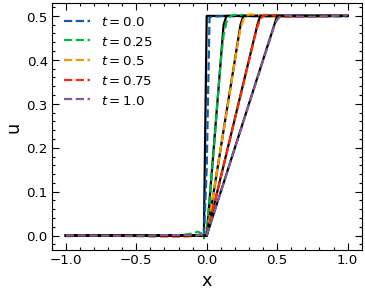

0.525 stopped at epoch: 0 | gpt_loss: 3.470834255218506,rMAE: [0.6505668759346008], rRMSE:[0.7579010128974915], 0.08675062656402588, 0.11282366514205933, 0.2255847007036209, 0.0
0.525 stopped at epoch: 200 | gpt_loss: 0.013958988711237907,rMAE: 0.08681989461183548, rRMSE:0.12451723217964172, 0.006425794679671526, 0.0007477256585843861, 5.593811692961026e-06, 0.0
0.525 stopped at epoch: 400 | gpt_loss: 0.005183666944503784,rMAE: 0.05465840548276901, rRMSE:0.08499308675527573, 0.0051308274269104, 3.3908015666384017e-06, 1.893139824460377e-06, 0.0
0.525 stopped at epoch: 600 | gpt_loss: 0.004639272578060627,rMAE: 0.041468776762485504, rRMSE:0.06668224930763245, 0.0045893434435129166, 3.155563490508939e-06, 1.8373623333900468e-06, 0.0
0.525 stopped at epoch: 800 | gpt_loss: 0.0041582416743040085,rMAE: 0.02787114307284355, rRMSE:0.04607604816555977, 0.004114882089197636, 2.6255513603246072e-06, 1.7104198377637658e-06, 0.0
0.525 stopped at epoch: 1000 | gpt_loss: 0.003891677362844348,rMAE: 0

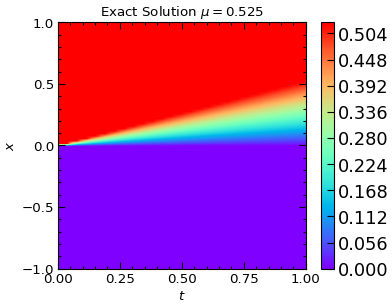

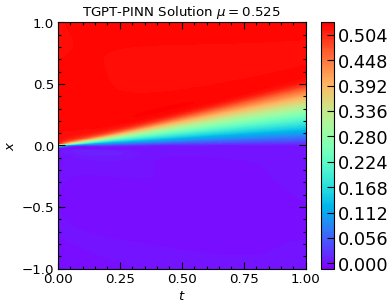

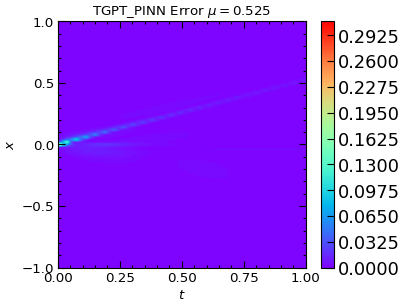

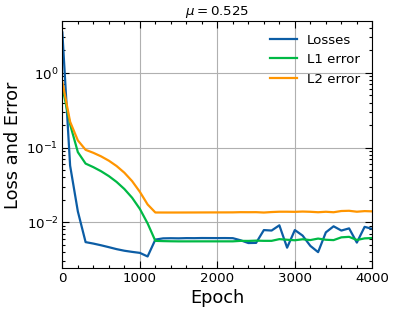

GPT-PINN at 0.525 with the Loss=0.008159235119819641, rMAE = 0.006148167420178652, rRMSE = 0.013986065983772278


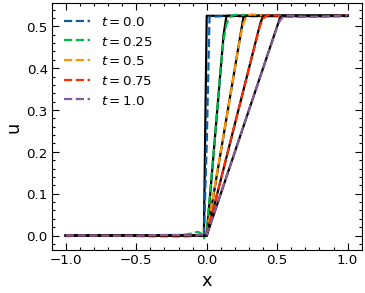

0.55 stopped at epoch: 0 | gpt_loss: 3.1174378395080566,rMAE: [0.5867871642112732], rRMSE:[0.6863094568252563], 0.08021309971809387, 0.10126058012247086, 0.20246189832687378, 0.0
0.55 stopped at epoch: 200 | gpt_loss: 0.006177970673888922,rMAE: 0.062333256006240845, rRMSE:0.0941987931728363, 0.006071474403142929, 9.027889973367564e-06, 1.6217202301049838e-06, 0.0
0.55 stopped at epoch: 400 | gpt_loss: 0.005495878402143717,rMAE: 0.0471806675195694, rRMSE:0.07386831939220428, 0.005448495969176292, 3.182585260219639e-06, 1.5556350945189479e-06, 0.0
0.55 stopped at epoch: 600 | gpt_loss: 0.004838724620640278,rMAE: 0.03220920264720917, rRMSE:0.052151940762996674, 0.0047928462736308575, 3.0601720482081873e-06, 1.5276616522896802e-06, 0.0
0.55 stopped at epoch: 800 | gpt_loss: 0.004426447208970785,rMAE: 0.017579032108187675, rRMSE:0.029235176742076874, 0.0043943640775978565, 1.8252083009429043e-06, 1.3831042906531366e-06, 0.0
0.55 stopped at epoch: 1000 | gpt_loss: 0.007739357650279999,rMAE: 

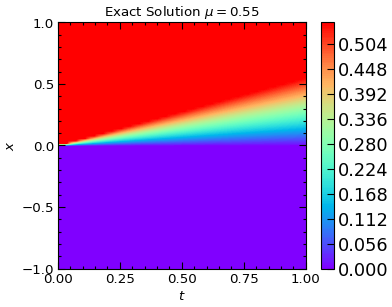

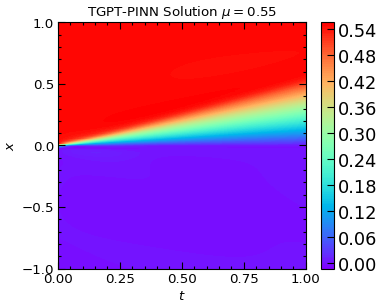

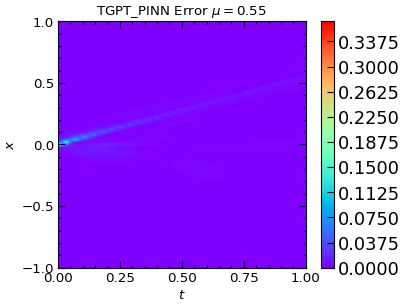

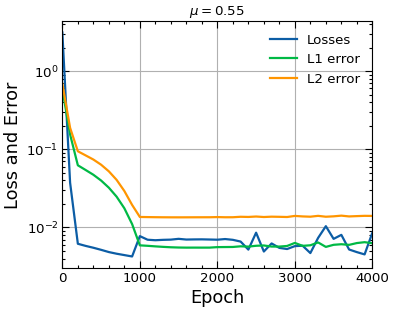

GPT-PINN at 0.55 with the Loss=0.008530696853995323, rMAE = 0.006276924163103104, rRMSE = 0.014025677926838398


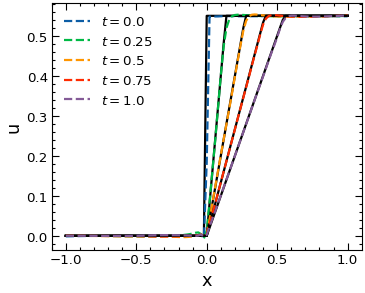

0.575 stopped at epoch: 0 | gpt_loss: 2.783254623413086,rMAE: [0.5287629961967468], rRMSE:[0.620856523513794], 0.07413769513368607, 0.09032254666090012, 0.18058915436267853, 0.0
0.575 stopped at epoch: 200 | gpt_loss: 0.006539769936352968,rMAE: 0.0563477985560894, rRMSE:0.0851515382528305, 0.0065068770200014114, 1.6984897683869349e-06, 1.5908201476122485e-06, 0.0
0.575 stopped at epoch: 400 | gpt_loss: 0.005802249535918236,rMAE: 0.03959609568119049, rRMSE:0.06228496879339218, 0.005756826605647802, 3.189607923559379e-06, 1.352707840851508e-06, 0.0
0.575 stopped at epoch: 600 | gpt_loss: 0.005123478826135397,rMAE: 0.022793756797909737, rRMSE:0.03705218806862831, 0.0050847288221120834, 2.538571607146878e-06, 1.336424475084641e-06, 0.0
0.575 stopped at epoch: 800 | gpt_loss: 0.004512719344347715,rMAE: 0.007686740718781948, rRMSE:0.015239031054079533, 0.004487825091928244, 1.2908366215924616e-06, 1.198596578433353e-06, 0.0
0.575 stopped at epoch: 1000 | gpt_loss: 0.007870362140238285,rMAE: 

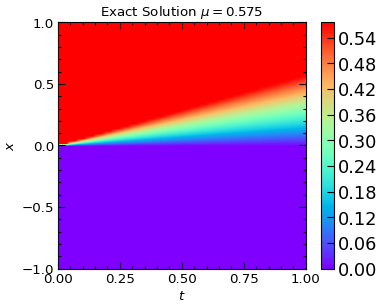

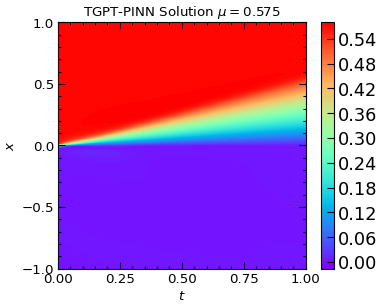

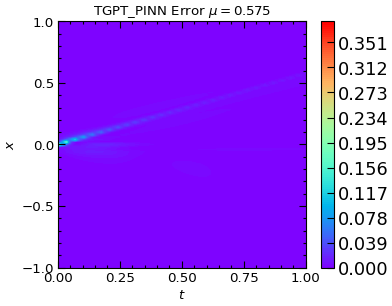

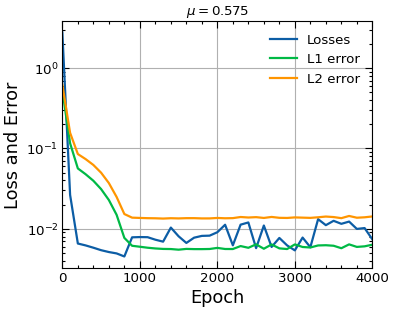

GPT-PINN at 0.575 with the Loss=0.007375503424555063, rMAE = 0.006324238143861294, rRMSE = 0.01422192994505167


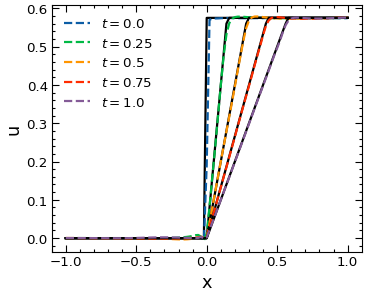

0.6 stopped at epoch: 0 | gpt_loss: 2.468282461166382,rMAE: [0.4756934940814972], rRMSE:[0.560717761516571], 0.06852436810731888, 0.08000946789979935, 0.1599663496017456, 0.0
0.6 stopped at epoch: 200 | gpt_loss: 0.006995259318500757,rMAE: 0.04946388676762581, rRMSE:0.0750151202082634, 0.00693958206102252, 4.298376097722212e-06, 1.2693628832494142e-06, 0.0
0.6 stopped at epoch: 400 | gpt_loss: 0.006077074911445379,rMAE: 0.03138308972120285, rRMSE:0.04952428117394447, 0.006031770724803209, 3.3130454539787024e-06, 1.2173719596830779e-06, 0.0
0.6 stopped at epoch: 600 | gpt_loss: 0.0054660821333527565,rMAE: 0.013197138905525208, rRMSE:0.022181404754519463, 0.005436440464109182, 1.7485464240962756e-06, 1.2156085631431779e-06, 0.0
0.6 stopped at epoch: 800 | gpt_loss: 0.008871601894497871,rMAE: 0.006272278260439634, rRMSE:0.01376193668693304, 0.008850814774632454, 1.0447333806951065e-06, 1.033968601404922e-06, 0.0
0.6 stopped at epoch: 1000 | gpt_loss: 0.008890178985893726,rMAE: 0.005837539

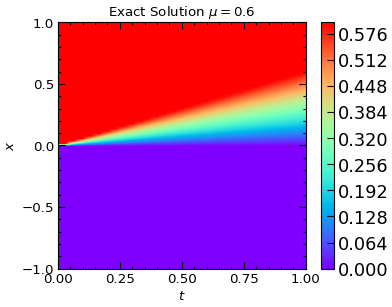

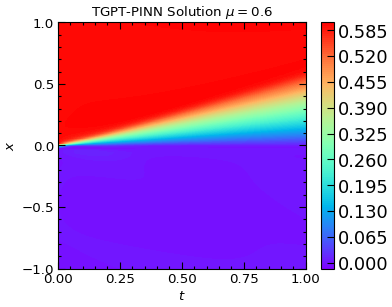

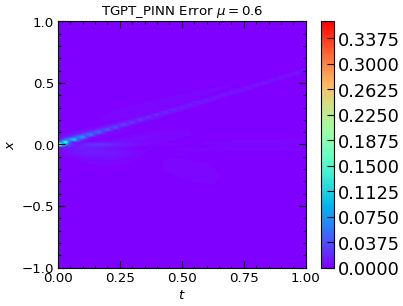

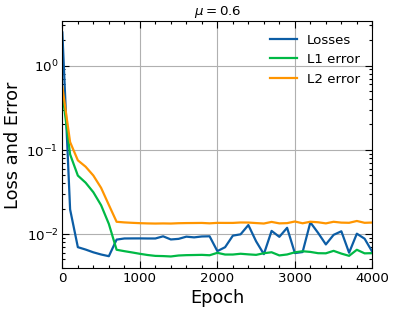

GPT-PINN at 0.6 with the Loss=0.00614502327516675, rMAE = 0.005943648982793093, rRMSE = 0.013710197992622852


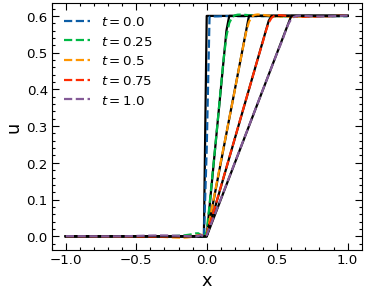

0.625 stopped at epoch: 0 | gpt_loss: 2.172523021697998,rMAE: [0.4270821809768677], rRMSE:[0.5053579211235046], 0.0633731484413147, 0.07032141834497452, 0.14059358835220337, 0.0
0.625 stopped at epoch: 200 | gpt_loss: 0.0074499123729765415,rMAE: 0.04329654201865196, rRMSE:0.06570177525281906, 0.007406282238662243, 3.3384178550477372e-06, 1.0245859130009194e-06, 0.0
0.625 stopped at epoch: 400 | gpt_loss: 0.00642025750130415,rMAE: 0.022510794922709465, rRMSE:0.035669103264808655, 0.006378993857651949, 2.9868210731365252e-06, 1.1395402452762937e-06, 0.0
0.625 stopped at epoch: 600 | gpt_loss: 0.010627328418195248,rMAE: 0.0065977368503808975, rRMSE:0.014002535492181778, 0.010605065152049065, 1.1645994391074055e-06, 1.0617453654049314e-06, 0.0
0.625 stopped at epoch: 800 | gpt_loss: 0.009987161494791508,rMAE: 0.006107941269874573, rRMSE:0.013589870184659958, 0.009967460297048092, 9.887519354379037e-07, 9.813606993702706e-07, 0.0
0.625 stopped at epoch: 1000 | gpt_loss: 0.009784058667719364

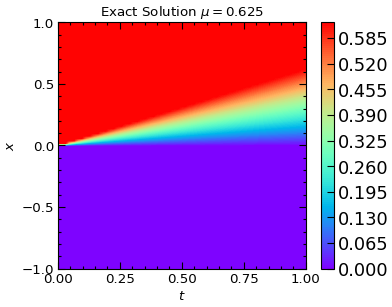

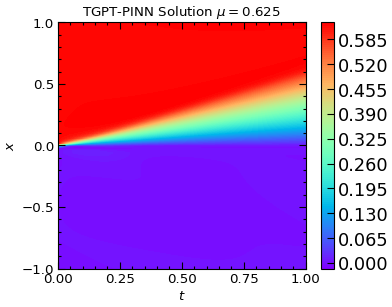

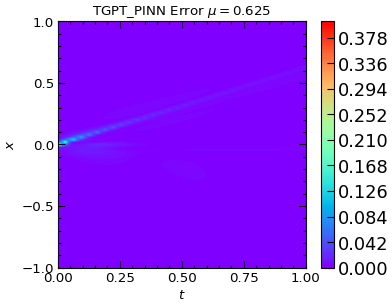

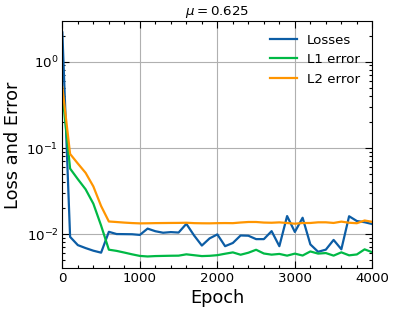

GPT-PINN at 0.625 with the Loss=0.013061468489468098, rMAE = 0.006150614004582167, rRMSE = 0.013858623802661896


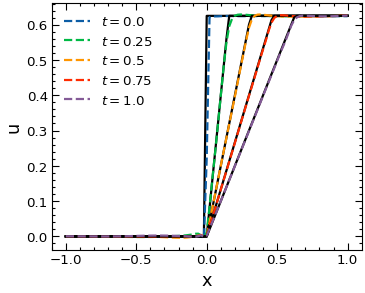

0.65 stopped at epoch: 0 | gpt_loss: 1.895975947380066,rMAE: [0.38236457109451294], rRMSE:[0.45414870977401733], 0.05868402123451233, 0.06125836819410324, 0.12247083336114883, 0.0
0.65 stopped at epoch: 200 | gpt_loss: 0.007868090644478798,rMAE: 0.03644929453730583, rRMSE:0.05539592728018761, 0.007822140119969845, 3.635609346019919e-06, 9.59438580139249e-07, 0.0
0.65 stopped at epoch: 400 | gpt_loss: 0.006844867952167988,rMAE: 0.013314168900251389, rRMSE:0.022024456411600113, 0.006810646504163742, 2.3045161015033955e-06, 1.1176077805430396e-06, 0.0
0.65 stopped at epoch: 600 | gpt_loss: 0.011268396861851215,rMAE: 0.006487566977739334, rRMSE:0.01384346466511488, 0.011247330345213413, 1.125456265071989e-06, 9.811668633119552e-07, 0.0
0.65 stopped at epoch: 800 | gpt_loss: 0.011159872636198997,rMAE: 0.005777657963335514, rRMSE:0.013370243832468987, 0.011141669005155563, 9.049652476278425e-07, 9.153539508588437e-07, 0.0
0.65 stopped at epoch: 1000 | gpt_loss: 0.008433759212493896,rMAE: 0.0

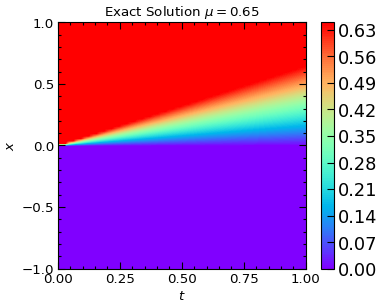

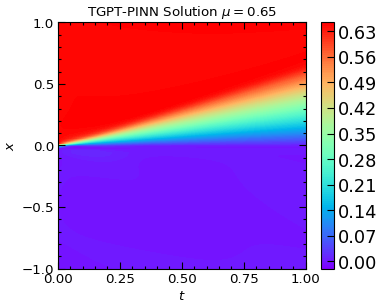

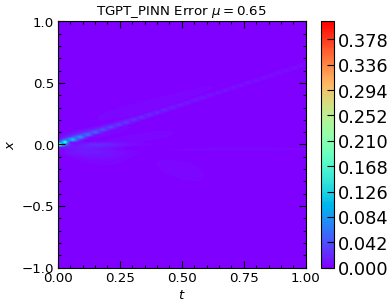

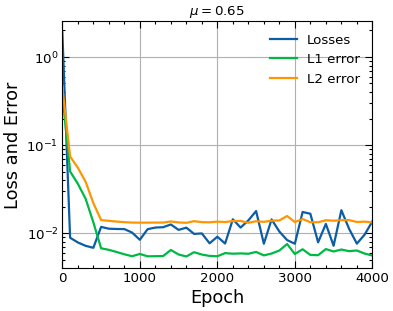

GPT-PINN at 0.65 with the Loss=0.013647357001900673, rMAE = 0.005592611152678728, rRMSE = 0.013290273025631905


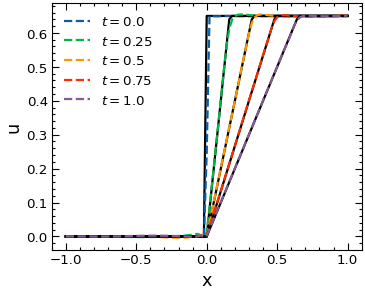

0.675 stopped at epoch: 0 | gpt_loss: 1.6386404037475586,rMAE: [0.3410676121711731], rRMSE:[0.40669354796409607], 0.05445697903633118, 0.052820298820734024, 0.10559804737567902, 0.0
0.675 stopped at epoch: 200 | gpt_loss: 0.008254212327301502,rMAE: 0.02904966101050377, rRMSE:0.04420867934823036, 0.008205350488424301, 3.997299245384056e-06, 8.888615070645756e-07, 0.0
0.675 stopped at epoch: 400 | gpt_loss: 0.01268422044813633,rMAE: 0.006952742580324411, rRMSE:0.014307301491498947, 0.012661494314670563, 1.2560444702103268e-06, 1.0165995263378136e-06, 0.0
0.675 stopped at epoch: 600 | gpt_loss: 0.012512913905084133,rMAE: 0.006160865072160959, rRMSE:0.013561956584453583, 0.012493770569562912, 1.0164200148210512e-06, 8.978952337201918e-07, 0.0
0.675 stopped at epoch: 800 | gpt_loss: 0.017895307391881943,rMAE: 0.005654461681842804, rRMSE:0.01336889248341322, 0.017875509336590767, 1.0952265938612982e-06, 8.844859848977649e-07, 0.0
0.675 stopped at epoch: 1000 | gpt_loss: 0.013094957917928696,

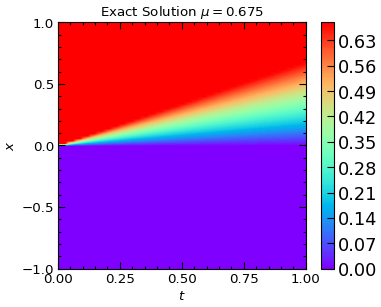

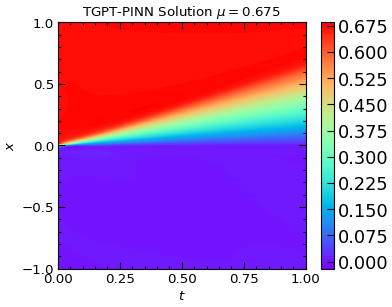

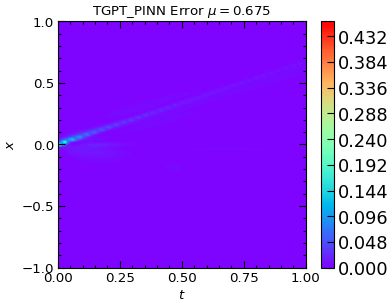

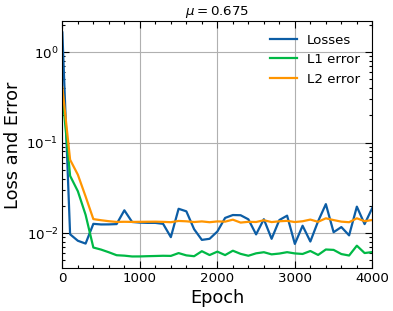

GPT-PINN at 0.675 with the Loss=0.019061259925365448, rMAE = 0.006197900976985693, rRMSE = 0.013992970809340477


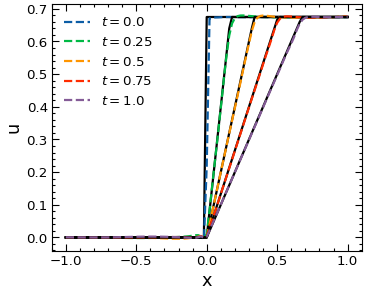

0.7 stopped at epoch: 0 | gpt_loss: 1.400517463684082,rMAE: [0.3028659522533417], rRMSE:[0.36251595616340637], 0.05069204792380333, 0.04500724747776985, 0.08997529000043869, 0.0
0.7 stopped at epoch: 200 | gpt_loss: 0.008748674765229225,rMAE: 0.02136126719415188, rRMSE:0.03269938379526138, 0.008702133782207966, 3.7796044125570916e-06, 8.745053605707653e-07, 0.0
0.7 stopped at epoch: 400 | gpt_loss: 0.013938765041530132,rMAE: 0.006713134702295065, rRMSE:0.013940022327005863, 0.013917657546699047, 1.2079898397132638e-06, 9.02739770936023e-07, 0.0
0.7 stopped at epoch: 600 | gpt_loss: 0.01378127932548523,rMAE: 0.005647237878292799, rRMSE:0.013215603306889534, 0.013764149509370327, 8.879472375156183e-07, 8.250623864114459e-07, 0.0
0.7 stopped at epoch: 800 | gpt_loss: 0.014179377816617489,rMAE: 0.005526056047528982, rRMSE:0.013265535235404968, 0.014162354171276093, 8.85858071342227e-07, 8.165044960151135e-07, 0.0
0.7 stopped at epoch: 1000 | gpt_loss: 0.012400290928781033,rMAE: 0.006020055

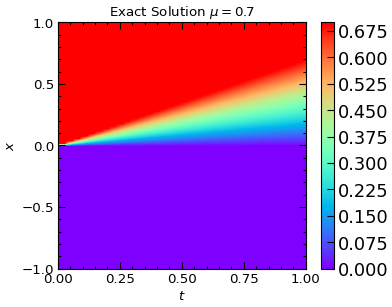

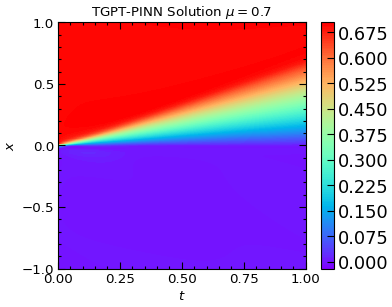

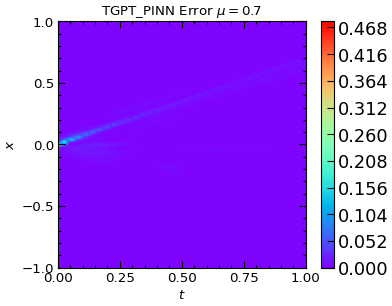

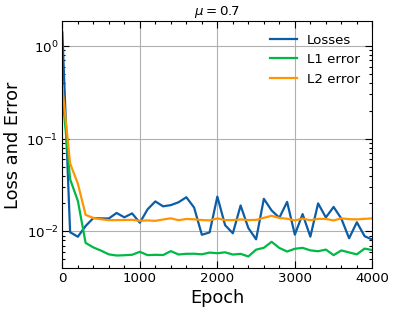

GPT-PINN at 0.7 with the Loss=0.008135347627103329, rMAE = 0.0062825968489050865, rRMSE = 0.013804100453853607


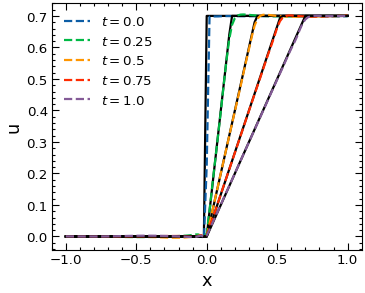

0.725 stopped at epoch: 0 | gpt_loss: 1.1816058158874512,rMAE: [0.2674574553966522], rRMSE:[0.3213125765323639], 0.047389205545186996, 0.03781917691230774, 0.07560249418020248, 0.0
0.725 stopped at epoch: 200 | gpt_loss: 0.00935137178748846,rMAE: 0.013574941083788872, rRMSE:0.021805215626955032, 0.009312274865806103, 3.0310568490676815e-06, 8.786559533291438e-07, 0.0
0.725 stopped at epoch: 400 | gpt_loss: 0.015346918255090714,rMAE: 0.00628091162070632, rRMSE:0.013546335510909557, 0.015328461304306984, 1.0466955018273438e-06, 7.990257131496037e-07, 0.0
0.725 stopped at epoch: 600 | gpt_loss: 0.018307648599147797,rMAE: 0.005355226807296276, rRMSE:0.0132334865629673, 0.01829027757048607, 9.186796319227142e-07, 8.184094895113958e-07, 0.0
0.725 stopped at epoch: 800 | gpt_loss: 0.017423903569579124,rMAE: 0.005994429346174002, rRMSE:0.013452544808387756, 0.01740504428744316, 1.1553977401490556e-06, 7.305436042770452e-07, 0.0
0.725 stopped at epoch: 1000 | gpt_loss: 0.024659976363182068,rMAE

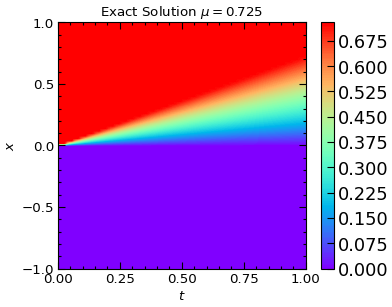

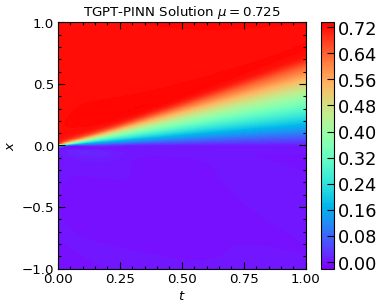

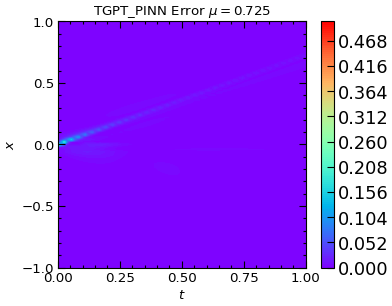

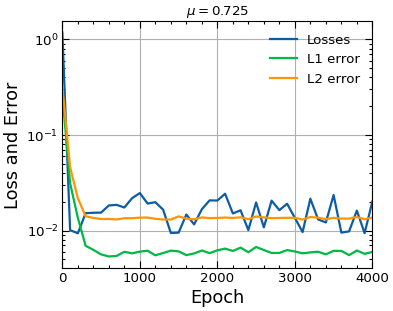

GPT-PINN at 0.725 with the Loss=0.020124303176999092, rMAE = 0.00597091531381011, rRMSE = 0.013646714389324188


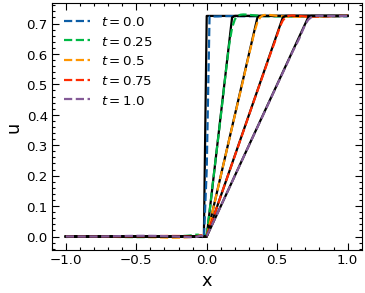

0.75 stopped at epoch: 0 | gpt_loss: 0.9819071292877197,rMAE: [0.2345784306526184], rRMSE:[0.2827911078929901], 0.044548459351062775, 0.03125612810254097, 0.062479738146066666, 0.0
0.75 stopped at epoch: 200 | gpt_loss: 0.015946730971336365,rMAE: 0.007220568601042032, rRMSE:0.014681384898722172, 0.01591508835554123, 2.404595534244436e-06, 7.597587341479084e-07, 0.0
0.75 stopped at epoch: 400 | gpt_loss: 0.016769420355558395,rMAE: 0.005640794523060322, rRMSE:0.013175944797694683, 0.016754306852817535, 8.286603474516596e-07, 6.82627501191746e-07, 0.0
0.75 stopped at epoch: 600 | gpt_loss: 0.02547043189406395,rMAE: 0.005467303097248077, rRMSE:0.013056298717856407, 0.02545606717467308, 8.051938493736088e-07, 6.312015443654673e-07, 0.0
0.75 stopped at epoch: 800 | gpt_loss: 0.012226127088069916,rMAE: 0.005379272159188986, rRMSE:0.013128142803907394, 0.012211344204843044, 8.068658416959806e-07, 6.714101346005918e-07, 0.0
0.75 stopped at epoch: 1000 | gpt_loss: 0.02193998172879219,rMAE: 0.005

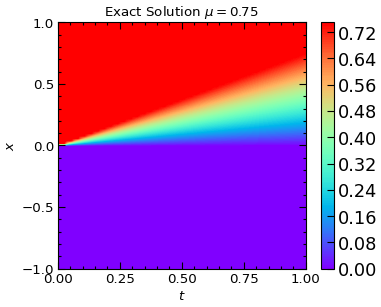

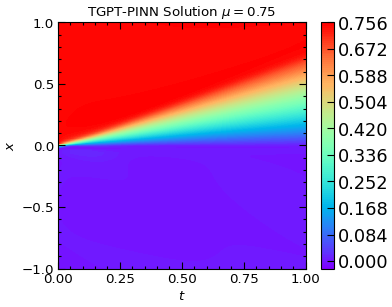

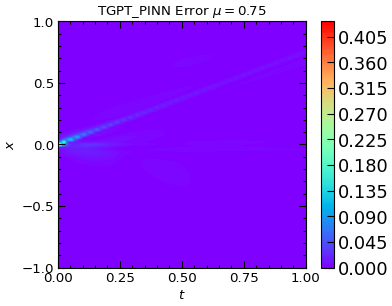

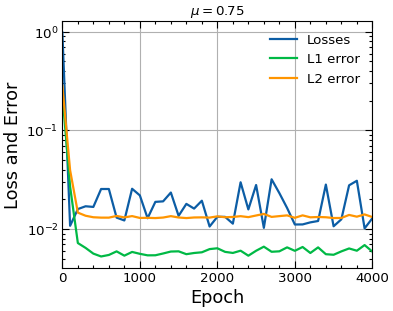

GPT-PINN at 0.75 with the Loss=0.012861963361501694, rMAE = 0.00591367669403553, rRMSE = 0.013240691274404526


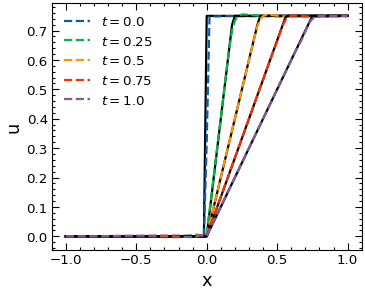

0.775 stopped at epoch: 0 | gpt_loss: 0.8014203310012817,rMAE: [0.2039620280265808], rRMSE:[0.24669015407562256], 0.04216981306672096, 0.025318071246147156, 0.05060698091983795, 0.0
0.775 stopped at epoch: 200 | gpt_loss: 0.019693655893206596,rMAE: 0.006738700903952122, rRMSE:0.013887911103665829, 0.019675718620419502, 1.0962050964735681e-06, 6.975404858167167e-07, 0.0
0.775 stopped at epoch: 400 | gpt_loss: 0.016110766679048538,rMAE: 0.005892736371606588, rRMSE:0.01301632821559906, 0.016096817329525948, 8.362789003513171e-07, 5.587471036960778e-07, 0.0
0.775 stopped at epoch: 600 | gpt_loss: 0.02833862416446209,rMAE: 0.005635953973978758, rRMSE:0.013437931425869465, 0.0283215269446373, 1.012404482025886e-06, 6.97257746651303e-07, 0.0
0.775 stopped at epoch: 800 | gpt_loss: 0.013467217795550823,rMAE: 0.006479108240455389, rRMSE:0.013724494725465775, 0.013453389517962933, 8.475374215777265e-07, 5.352893595045316e-07, 0.0
0.775 stopped at epoch: 1000 | gpt_loss: 0.014762585051357746,rMAE

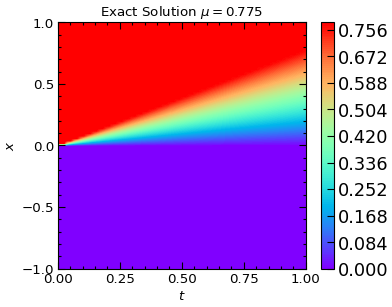

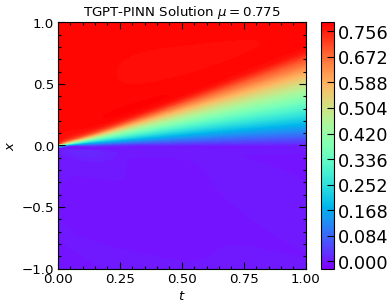

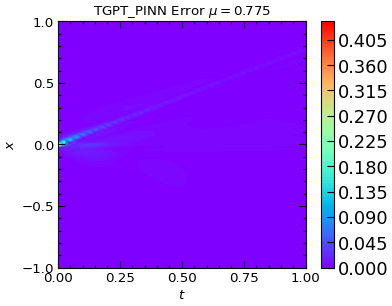

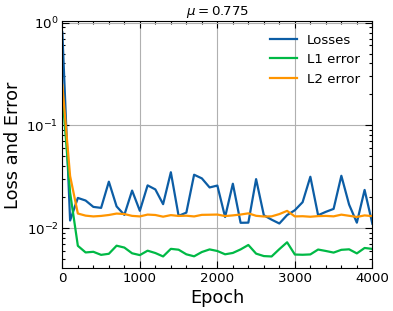

GPT-PINN at 0.775 with the Loss=0.011053161695599556, rMAE = 0.006285348907113075, rRMSE = 0.013101797550916672


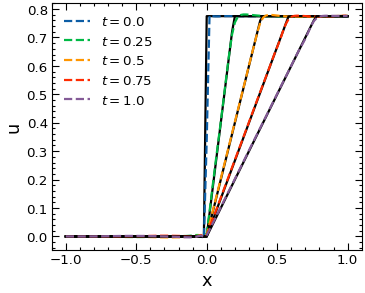

0.8 stopped at epoch: 0 | gpt_loss: 0.6401453018188477,rMAE: [0.17537930607795715], rRMSE:[0.21277517080307007], 0.040253255516290665, 0.020005006343126297, 0.039984192699193954, 0.0
0.8 stopped at epoch: 200 | gpt_loss: 0.020322557538747787,rMAE: 0.006213076412677765, rRMSE:0.01352471113204956, 0.020306995138525963, 9.507493814453483e-07, 6.0545852420546e-07, 0.0
0.8 stopped at epoch: 400 | gpt_loss: 0.027111036702990532,rMAE: 0.0054840161465108395, rRMSE:0.013324701227247715, 0.027093850076198578, 1.0937901606666856e-06, 6.248408794817806e-07, 0.0
0.8 stopped at epoch: 600 | gpt_loss: 0.011930239386856556,rMAE: 0.007591783534735441, rRMSE:0.014630157500505447, 0.011916100047528744, 6.812338710915355e-07, 7.326867148549354e-07, 0.0
0.8 stopped at epoch: 800 | gpt_loss: 0.01508533675223589,rMAE: 0.006204995326697826, rRMSE:0.013486336916685104, 0.015068954788148403, 1.1982018577327835e-06, 4.3999472154609975e-07, 0.0
0.8 stopped at epoch: 1000 | gpt_loss: 0.028222989290952682,rMAE: 0.0

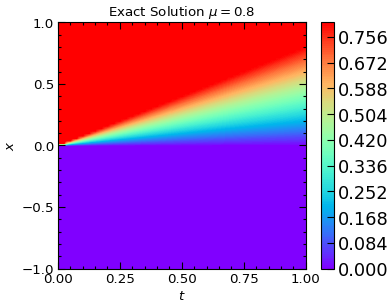

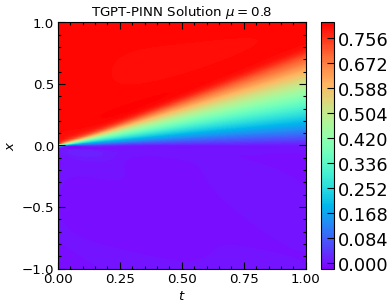

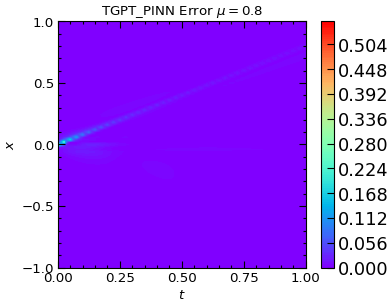

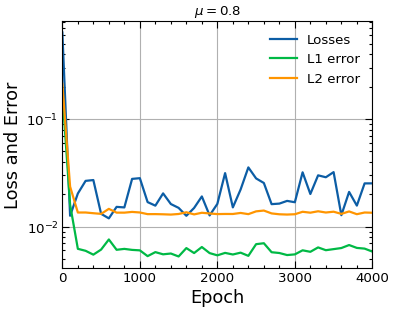

GPT-PINN at 0.8 with the Loss=0.025256432592868805, rMAE = 0.005856137722730637, rRMSE = 0.013460604473948479


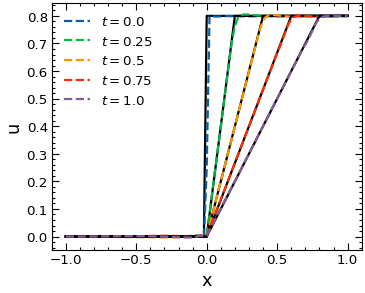

0.825 stopped at epoch: 0 | gpt_loss: 0.49808257818222046,rMAE: [0.14866413176059723], rRMSE:[0.18085238337516785], 0.038798797875642776, 0.015316951088607311, 0.030611427500844002, 0.0
0.825 stopped at epoch: 200 | gpt_loss: 0.029885364696383476,rMAE: 0.005676168482750654, rRMSE:0.013131663203239441, 0.029870420694351196, 8.749501603233512e-07, 6.194271691128961e-07, 0.0
0.825 stopped at epoch: 400 | gpt_loss: 0.016824835911393166,rMAE: 0.006126995198428631, rRMSE:0.01334372628480196, 0.016806093975901604, 1.4043413330000476e-06, 4.698766247202002e-07, 0.0
0.825 stopped at epoch: 600 | gpt_loss: 0.015761159360408783,rMAE: 0.006231207400560379, rRMSE:0.013697567395865917, 0.015735570341348648, 1.4358488442667294e-06, 1.122994945035316e-06, 0.0
0.825 stopped at epoch: 800 | gpt_loss: 0.015219497494399548,rMAE: 0.00855786819010973, rRMSE:0.015039369463920593, 0.01518654078245163, 2.8022925562254386e-06, 4.933579020871548e-07, 0.0
0.825 stopped at epoch: 1000 | gpt_loss: 0.013223187997937

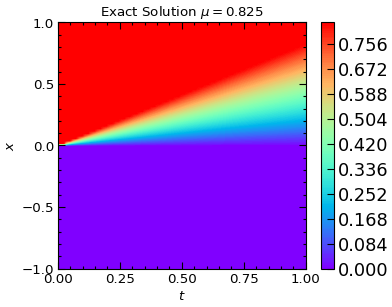

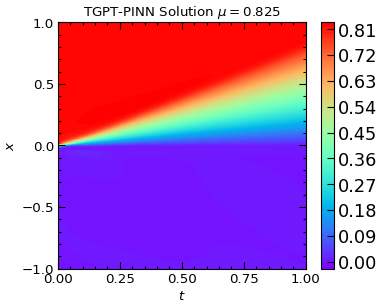

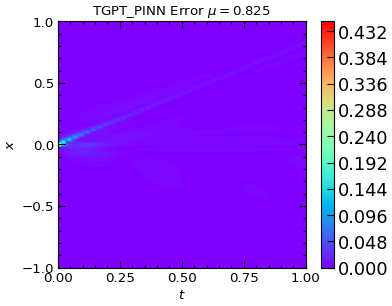

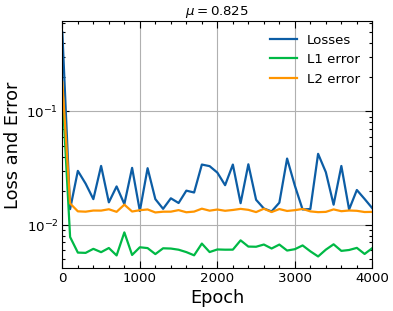

GPT-PINN at 0.825 with the Loss=0.01397167518734932, rMAE = 0.006218964699655771, rRMSE = 0.012983933091163635


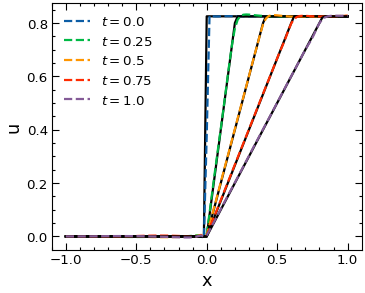

0.85 stopped at epoch: 0 | gpt_loss: 0.3752317428588867,rMAE: [0.12369290739297867], rRMSE:[0.15077237784862518], 0.037806436419487, 0.011253885924816132, 0.02248864434659481, 0.0
0.85 stopped at epoch: 200 | gpt_loss: 0.03164078667759895,rMAE: 0.007412719540297985, rRMSE:0.014014947228133678, 0.0316171869635582, 1.6682250816302258e-06, 6.917598511790857e-07, 0.0
0.85 stopped at epoch: 400 | gpt_loss: 0.015243222005665302,rMAE: 0.005785580724477768, rRMSE:0.013194538652896881, 0.015227096155285835, 9.57118231781351e-07, 6.554860192409251e-07, 0.0
0.85 stopped at epoch: 600 | gpt_loss: 0.030677994713187218,rMAE: 0.00611469941213727, rRMSE:0.01339575182646513, 0.030659878626465797, 1.242302346327051e-06, 5.692570539395092e-07, 0.0
0.85 stopped at epoch: 800 | gpt_loss: 0.015604752115905285,rMAE: 0.005496407393366098, rRMSE:0.013029161840677261, 0.015587146393954754, 1.114961264647718e-06, 6.45647332930821e-07, 0.0
0.85 stopped at epoch: 1000 | gpt_loss: 0.0255019161850214,rMAE: 0.0054585

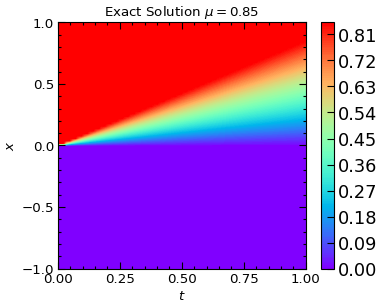

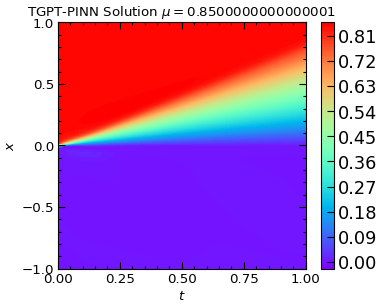

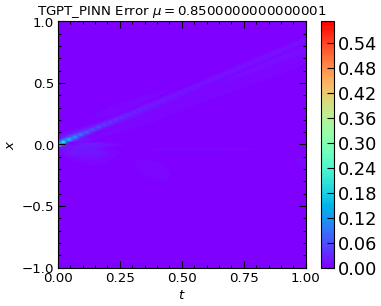

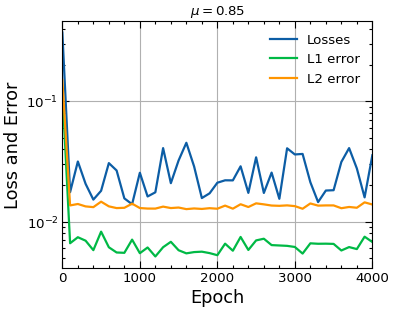

GPT-PINN at 0.8500000000000001 with the Loss=0.03565141186118126, rMAE = 0.006763642653822899, rRMSE = 0.013876144774258137


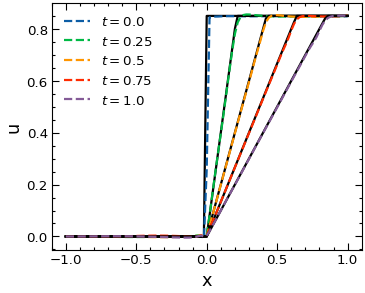

0.875 stopped at epoch: 0 | gpt_loss: 0.27159327268600464,rMAE: [0.10036973655223846], rRMSE:[0.12237947434186935], 0.037276167422533035, 0.0078158313408494, 0.015615878626704216, 0.0
0.875 stopped at epoch: 200 | gpt_loss: 0.03787983953952789,rMAE: 0.0057449196465313435, rRMSE:0.013075755909085274, 0.03785663843154907, 1.4807895922785974e-06, 8.394356996177521e-07, 0.0
0.875 stopped at epoch: 400 | gpt_loss: 0.02031405083835125,rMAE: 0.006018310319632292, rRMSE:0.013311931863427162, 0.020296256989240646, 9.476225955040718e-07, 8.317742867802735e-07, 0.0
0.875 stopped at epoch: 600 | gpt_loss: 0.03763649985194206,rMAE: 0.005700438283383846, rRMSE:0.013232216238975525, 0.03761417046189308, 1.3271890111354878e-06, 9.056540193341789e-07, 0.0
0.875 stopped at epoch: 800 | gpt_loss: 0.02749149687588215,rMAE: 0.006272738333791494, rRMSE:0.013349748216569424, 0.027460888028144836, 2.529422090447042e-06, 5.313963242770114e-07, 0.0
0.875 stopped at epoch: 1000 | gpt_loss: 0.0227796733379364,rMA

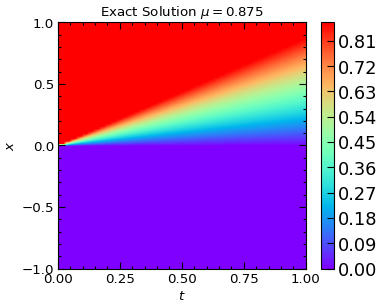

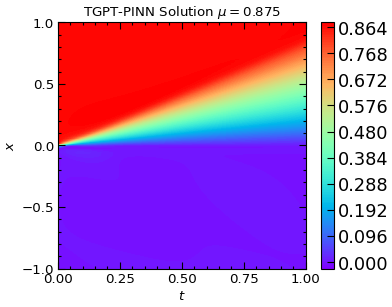

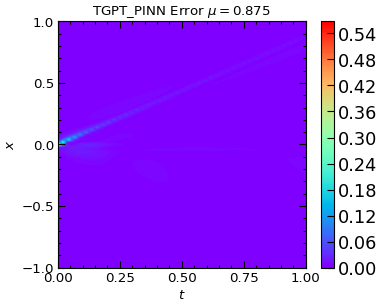

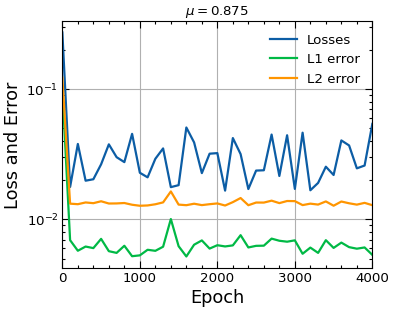

GPT-PINN at 0.875 with the Loss=0.054035987704992294, rMAE = 0.005338658113032579, rRMSE = 0.012846664525568485


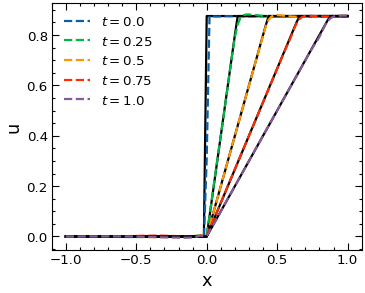

0.9 stopped at epoch: 0 | gpt_loss: 0.18716686964035034,rMAE: [0.07857726514339447], rRMSE:[0.0955614224076271], 0.03720800206065178, 0.0050027742981910706, 0.009993111714720726, 0.0
0.9 stopped at epoch: 200 | gpt_loss: 0.04181654006242752,rMAE: 0.005668767262250185, rRMSE:0.013067019172012806, 0.041795212775468826, 1.1331514997436898e-06, 9.995501386583783e-07, 0.0
0.9 stopped at epoch: 400 | gpt_loss: 0.04101228341460228,rMAE: 0.00569999311119318, rRMSE:0.01317225769162178, 0.04099380970001221, 9.610131428416935e-07, 8.864471396918816e-07, 0.0
0.9 stopped at epoch: 600 | gpt_loss: 0.026967080309987068,rMAE: 0.005796965677291155, rRMSE:0.012738635763525963, 0.026950055733323097, 8.397684609917633e-07, 8.626130920674768e-07, 0.0
0.9 stopped at epoch: 800 | gpt_loss: 0.021084100008010864,rMAE: 0.005994993727654219, rRMSE:0.012689669616520405, 0.02106267772614956, 1.40383474445116e-06, 7.384762739093276e-07, 0.0
0.9 stopped at epoch: 1000 | gpt_loss: 0.034238509833812714,rMAE: 0.0061900

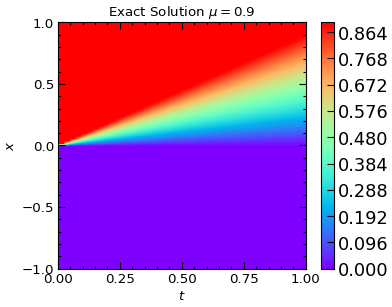

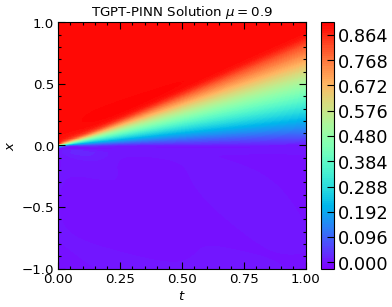

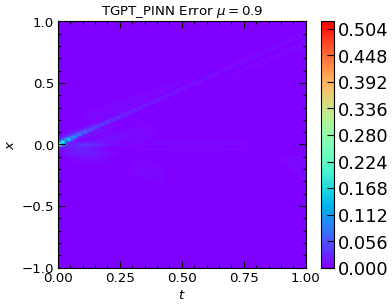

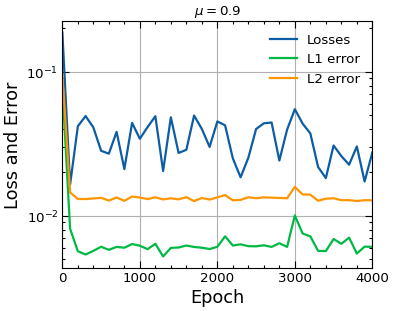

GPT-PINN at 0.9 with the Loss=0.027463197708129883, rMAE = 0.006079943384975195, rRMSE = 0.01279275119304657


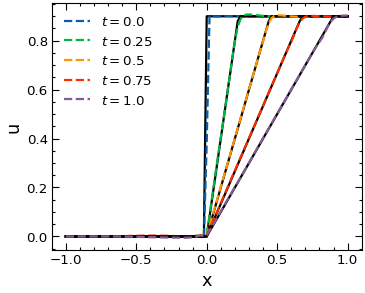

0.925 stopped at epoch: 0 | gpt_loss: 0.12195239961147308,rMAE: [0.058128293603658676], rRMSE:[0.07026111334562302], 0.037601929157972336, 0.002814712468534708, 0.005620333831757307, 0.0
0.925 stopped at epoch: 200 | gpt_loss: 0.04215105250477791,rMAE: 0.00548501405864954, rRMSE:0.013144884258508682, 0.042132481932640076, 7.782037414472143e-07, 1.078744389815256e-06, 0.0
0.925 stopped at epoch: 400 | gpt_loss: 0.024157019332051277,rMAE: 0.005563021171838045, rRMSE:0.0129028195515275, 0.024137265980243683, 6.692403076158371e-07, 1.3060730452707503e-06, 0.0
0.925 stopped at epoch: 600 | gpt_loss: 0.02901493012905121,rMAE: 0.006623805034905672, rRMSE:0.013622019439935684, 0.028980115428566933, 1.5557855022052536e-06, 1.9256237919762498e-06, 0.0
0.925 stopped at epoch: 800 | gpt_loss: 0.04612623527646065,rMAE: 0.006043151952326298, rRMSE:0.013328862376511097, 0.046099621802568436, 1.8801200667439844e-06, 7.811878504071501e-07, 0.0
0.925 stopped at epoch: 1000 | gpt_loss: 0.0183216668665409

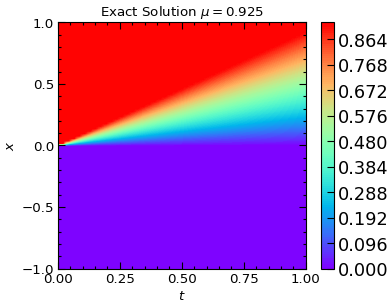

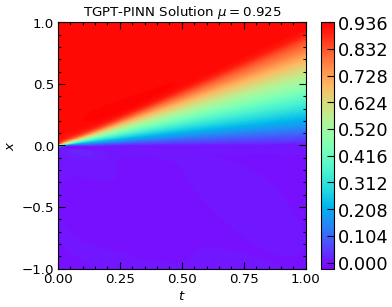

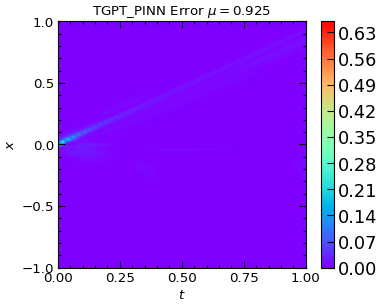

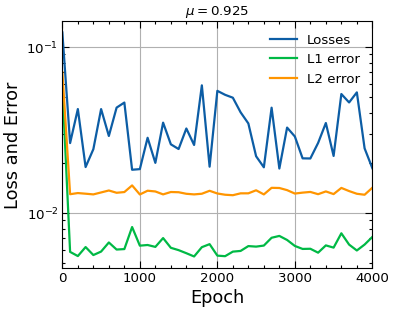

GPT-PINN at 0.925 with the Loss=0.018552882596850395, rMAE = 0.0071518635377287865, rRMSE = 0.014151408337056637


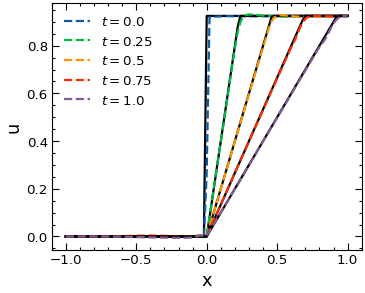

0.95 stopped at epoch: 0 | gpt_loss: 0.07595014572143555,rMAE: [0.038906924426555634], rRMSE:[0.046565473079681396], 0.038457948714494705, 0.0012516549322754145, 0.0024975647684186697, 0.0
0.95 stopped at epoch: 200 | gpt_loss: 0.03767313063144684,rMAE: 0.005828334484249353, rRMSE:0.013207630254328251, 0.037654753774404526, 1.3560695606429363e-06, 4.815689180759364e-07, 0.0
0.95 stopped at epoch: 400 | gpt_loss: 0.05157877132296562,rMAE: 0.0063680605962872505, rRMSE:0.013619191944599152, 0.05155814811587334, 1.4371379393196548e-06, 6.249994726204022e-07, 0.0
0.95 stopped at epoch: 600 | gpt_loss: 0.039328768849372864,rMAE: 0.005792255513370037, rRMSE:0.013345577754080296, 0.03930860012769699, 1.5114961797735305e-06, 5.052041842645849e-07, 0.0
0.95 stopped at epoch: 800 | gpt_loss: 0.025332696735858917,rMAE: 0.005791088100522757, rRMSE:0.012901612557470798, 0.02531694434583187, 5.798037818749435e-07, 9.95452182905865e-07, 0.0
0.95 stopped at epoch: 1000 | gpt_loss: 0.0313265398144722,rM

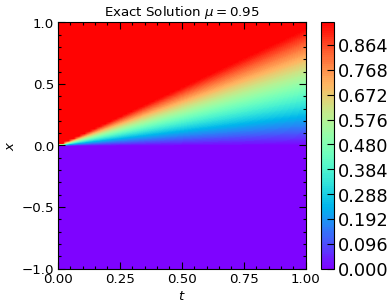

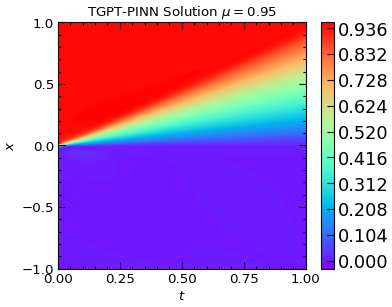

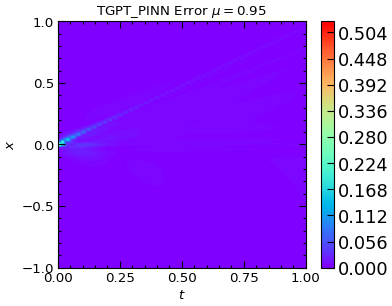

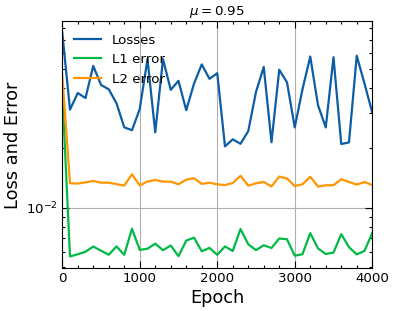

GPT-PINN at 0.95 with the Loss=0.030070096254348755, rMAE = 0.0074475593864917755, rRMSE = 0.012987888418138027


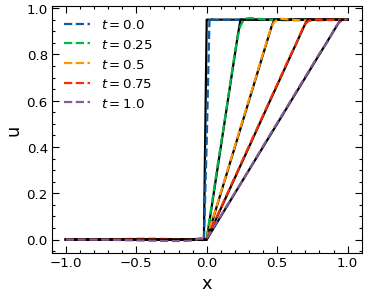

0.975 stopped at epoch: 0 | gpt_loss: 0.04915992170572281,rMAE: [0.020991697907447815], rRMSE:[0.025278789922595024], 0.039776068180799484, 0.0003135948209092021, 0.000624790380243212, 0.0
0.975 stopped at epoch: 200 | gpt_loss: 0.03344275429844856,rMAE: 0.005534454248845577, rRMSE:0.013151602819561958, 0.033431392163038254, 5.781981258223823e-07, 5.579886988016369e-07, 0.0
0.975 stopped at epoch: 400 | gpt_loss: 0.03916200250387192,rMAE: 0.00566144660115242, rRMSE:0.013211669400334358, 0.039148006588220596, 8.47356716349168e-07, 5.523826303033275e-07, 0.0
0.975 stopped at epoch: 600 | gpt_loss: 0.054903894662857056,rMAE: 0.0063202944584190845, rRMSE:0.013713482767343521, 0.05486973002552986, 2.73108003057132e-06, 6.852204705865006e-07, 0.0
0.975 stopped at epoch: 800 | gpt_loss: 0.052135173231363297,rMAE: 0.006325484719127417, rRMSE:0.013587236404418945, 0.0521085150539875, 1.5177409977695788e-06, 1.1480397006380372e-06, 0.0
0.975 stopped at epoch: 1000 | gpt_loss: 0.03039829432964325

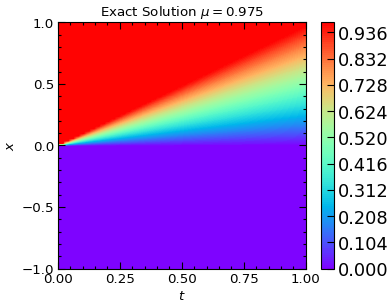

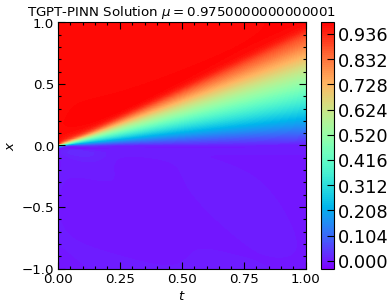

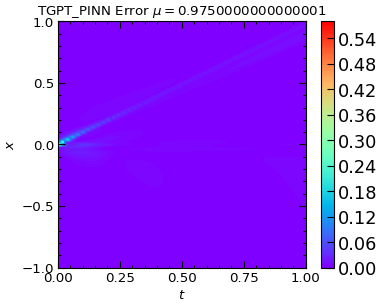

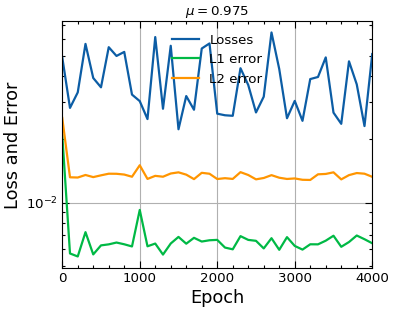

GPT-PINN at 0.9750000000000001 with the Loss=0.05092097073793411, rMAE = 0.006396691780537367, rRMSE = 0.013254364021122456


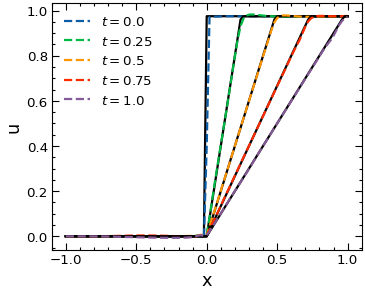

1.0 stopped at epoch: 0 | gpt_loss: 0.04158183932304382,rMAE: [0.005661510396748781], rRMSE:[0.01357274129986763], 0.041556280106306076, 5.364091748560895e-07, 2.019642124651e-06, 0.0
1.0 stopped at epoch: 200 | gpt_loss: 0.026974225416779518,rMAE: 0.005891531705856323, rRMSE:0.013499253429472446, 0.026944823563098907, 4.864486982114613e-07, 2.453684146530577e-06, 0.0
1.0 stopped at epoch: 400 | gpt_loss: 0.03084033913910389,rMAE: 0.00621750857681036, rRMSE:0.013732530176639557, 0.030811864882707596, 5.697599476661708e-07, 2.277732164657209e-06, 0.0
1.0 stopped at epoch: 600 | gpt_loss: 0.04125189781188965,rMAE: 0.005716353189200163, rRMSE:0.013311649672687054, 0.04122615605592728, 5.557707822845259e-07, 2.018324721575482e-06, 0.0
1.0 stopped at epoch: 800 | gpt_loss: 0.03554914891719818,rMAE: 0.005923760589212179, rRMSE:0.013134313747286797, 0.035519566386938095, 8.870643455338723e-07, 2.0711845536425244e-06, 0.0
1.0 stopped at epoch: 1000 | gpt_loss: 0.0332445465028286,rMAE: 0.006638

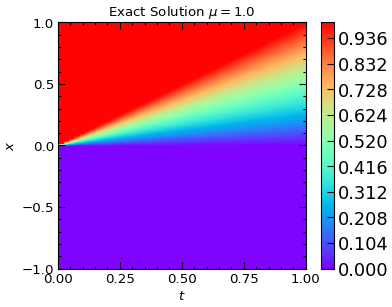

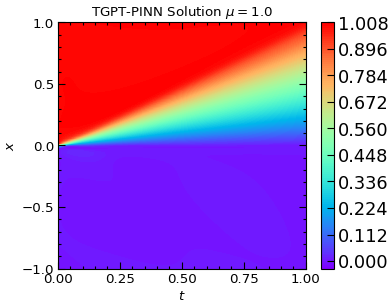

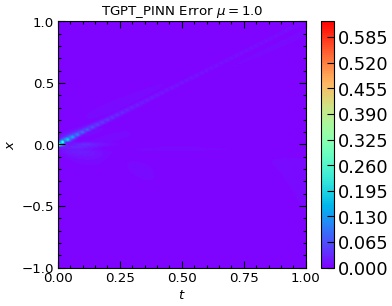

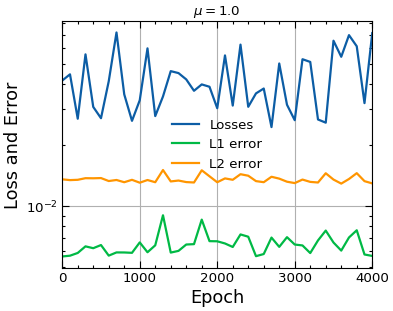

GPT-PINN at 1.0 with the Loss=0.07117973268032074, rMAE = 0.005696312990039587, rRMSE = 0.012959701009094715


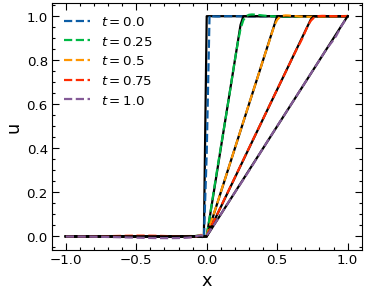

Largest Loss: 0.07117973268032074 at 1.0
Largest L1: 0.0074475593864917755 at 0.95
Largest L2: 0.014320223592221737 at 0.5
Loss:[0.005107764154672623, 0.008159235119819641, 0.008530696853995323, 0.007375503424555063, 0.00614502327516675, 0.013061468489468098, 0.013647357001900673, 0.019061259925365448, 0.008135347627103329, 0.020124303176999092, 0.012861963361501694, 0.011053161695599556, 0.025256432592868805, 0.01397167518734932, 0.03565141186118126, 0.054035987704992294, 0.027463197708129883, 0.018552882596850395, 0.030070096254348755, 0.05092097073793411, 0.07117973268032074]
L1:[0.006216804031282663, 0.006148167420178652, 0.006276924163103104, 0.006324238143861294, 0.005943648982793093, 0.006150614004582167, 0.005592611152678728, 0.006197900976985693, 0.0062825968489050865, 0.00597091531381011, 0.00591367669403553, 0.006285348907113075, 0.005856137722730637, 0.006218964699655771, 0.006763642653822899, 0.005338658113032579, 0.006079943384975195, 0.0071518635377287865, 0.007447559386

In [6]:
i=0
layers_gpt = np.array([2, i+1, 1])
c_initial  = torch.full((1,i+1), 1/(i+1))
nu_loss = []
L1_err  = []
L2_err  = []
Cor_err =  []

gpt_train_time_1 = time.perf_counter()
for nu in nu_training:
    Exact_y0 = exact_u(nu,xt_test)[:,None]

    IC_data = create_IC_data(nu, Xi, Xf, Ti, Tf, IC_pts, IC_simple)
    IC_xt     = IC_data[0].to(device)
    IC_u      = IC_data[1].to(device)

    #print((P_list[0]).linears[0].bias)
    GPT_PINN = GPT(nu, layers_gpt, P_list[0:i+1], c_initial,xt_resid, f_hat, Exact_y0, xt_test, IC_xt, IC_u,  BC1, BC2,xt_RHL, xt_RHR,xt_RHt,xt_RHtL,Nx_train,Nt_train,dt).to(device)

    gpt_losses = gpt_train(GPT_PINN, nu, xt_resid, f_hat, Exact_y0, xt_test, IC_xt, IC_u, BC1, BC2, epochs_gpt, lr_gpt, tol_gpt)

    nu_loss.append(gpt_losses[0].item())
    L1_err.append(gpt_losses[3][-1])
    L2_err.append(gpt_losses[4][-1])


    Burgers_plot(xt_test, Exact_y0, Nx_test,Nt_test,title=fr"Exact Solution $\mu={round(nu,3)}$")
    Burgers_plot(xt_test, GPT_PINN.forward(xt_test), Nx_test,Nt_test,title=fr"VGPT-PINN Solution $\mu={nu}$")
    Burgers_plot(xt_test, abs(GPT_PINN.forward(xt_test)-Exact_y0), Nx_test,Nt_test,title=fr"VGPT_PINN Error $\mu={nu}$")

    plt.figure(dpi=80, figsize=(5,4))    
    plt.plot(gpt_losses[1], gpt_losses[2], label="Losses")
    plt.plot(gpt_losses[1], gpt_losses[3], label="L1 error")
    plt.plot(gpt_losses[1], gpt_losses[4], label="L2 error")
    #plt.plot(gpt_losses[1], gpt_losses[5], label="Loss_implict")
    #plt.plot(gpt_losses[1], gpt_losses[8], label="Loss_Res")
    #plt.plot(gpt_losses[1], gpt_losses[6], label="Loss_IC")
    #plt.plot(gpt_losses[1], gpt_losses[7], label="Loss_BC")

    plt.xlabel("Epoch",     fontsize=16)
    plt.ylabel("Loss and Error", fontsize=16)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    
    plt.grid(True)
    plt.xlim(0,max(gpt_losses[1]))
    plt.yscale('log')
    plt.title(fr"$\mu={round(nu,3)}$", fontsize=12)
    plt.legend(fontsize = 12)#
    plt.show()

    #err =exact_u_err(exact_u(nu,xt_test)[:,None],GPT_PINN(xt_test),xt_test,nu)[1]
    #Cor_err.append(err.item())
    #print(f"GPT-PINN at {nu} with the Loss={gpt_losses[0].item()}, rMAE = {gpt_losses[3][-1]}, rRMSE = {gpt_losses[4][-1]} and Cor error = {err.item()}")
    print(f"GPT-PINN at {nu} with the Loss={gpt_losses[0].item()}, rMAE = {gpt_losses[3][-1]}, rRMSE = {gpt_losses[4][-1]}")

    plt.figure(dpi=80, figsize=(5,4))#dpi=150, figsize=(10,8)
    for ind in range(1, Nt_test+1,50):
        plt.plot(xt_test[0:Nx_test,0].detach().cpu(),Exact_y0[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),'k')
        #plt.scatter(xt_test[0:Nx_test,0].detach().cpu(),PINN(xt_test)[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),s=20,label=fr"$t={round((ind-1)*(Tf-Ti)/(Nt_test-1),3)}$")
        plt.plot(xt_test[0:Nx_test,0].detach().cpu(),GPT_PINN.forward(xt_test)[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),'--',label=fr"$t={round((ind-1)*(Tf-Ti)/(Nt_test-1),3)}$")
    plt.xlabel("x",     fontsize=16)
    plt.ylabel("u", fontsize=16)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=12)

    plt.legend(fontsize = 12)#
    plt.show()
        
print(f"Largest Loss: {max(nu_loss)} at {nu_training[nu_loss.index(max(nu_loss))]}")
print(f"Largest L1: {max(L1_err)} at {nu_training[L1_err.index(max(L1_err))]}")
print(f"Largest L2: {max(L2_err)} at {nu_training[L2_err.index(max(L2_err))]}") 

print(f"Loss:{nu_loss}")
print(f"L1:{L1_err}")
print(f"L2:{L2_err}")

In [7]:
print(f"Largest Loss: {max(nu_loss)} at {nu_training[nu_loss.index(max(nu_loss))]}")
print(f"Largest L1: {max(L1_err)} at {nu_training[L1_err.index(max(L1_err))]}")
print(f"Largest L2: {max(L2_err)} at {nu_training[L2_err.index(max(L2_err))]}") 
print(f"Loss:{nu_loss}")
print(f"L1:{L1_err}")
print(f"L2:{L2_err}")
print(f"Error:{Cor_err}")

Largest Loss: 0.07117973268032074 at 1.0
Largest L1: 0.0074475593864917755 at 0.95
Largest L2: 0.014320223592221737 at 0.5
Loss:[0.005107764154672623, 0.008159235119819641, 0.008530696853995323, 0.007375503424555063, 0.00614502327516675, 0.013061468489468098, 0.013647357001900673, 0.019061259925365448, 0.008135347627103329, 0.020124303176999092, 0.012861963361501694, 0.011053161695599556, 0.025256432592868805, 0.01397167518734932, 0.03565141186118126, 0.054035987704992294, 0.027463197708129883, 0.018552882596850395, 0.030070096254348755, 0.05092097073793411, 0.07117973268032074]
L1:[0.006216804031282663, 0.006148167420178652, 0.006276924163103104, 0.006324238143861294, 0.005943648982793093, 0.006150614004582167, 0.005592611152678728, 0.006197900976985693, 0.0062825968489050865, 0.00597091531381011, 0.00591367669403553, 0.006285348907113075, 0.005856137722730637, 0.006218964699655771, 0.006763642653822899, 0.005338658113032579, 0.006079943384975195, 0.0071518635377287865, 0.007447559386

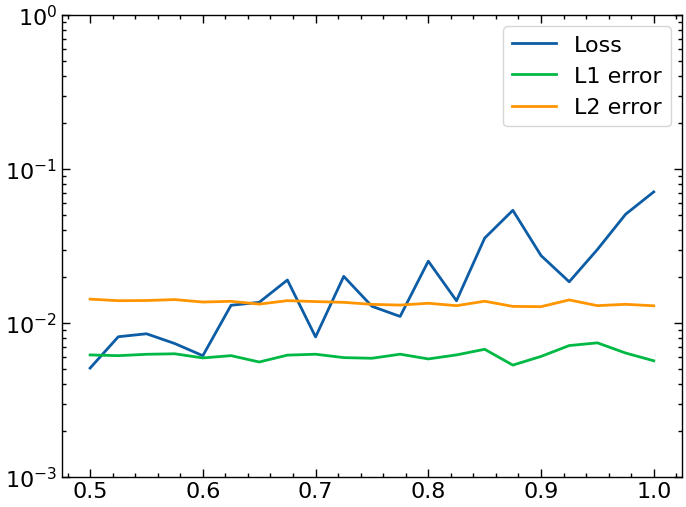

In [8]:
plt.errorbar(nu_training,nu_loss,label='Loss')
plt.errorbar(nu_training,L1_err,label='L1 error')
plt.errorbar(nu_training,L2_err,label='L2 error')
#plt.errorbar(nu_training,Cor_err,label='Cor error')
plt.legend(frameon=True)
plt.ylim(1e-3,1)
plt.yscale('log')

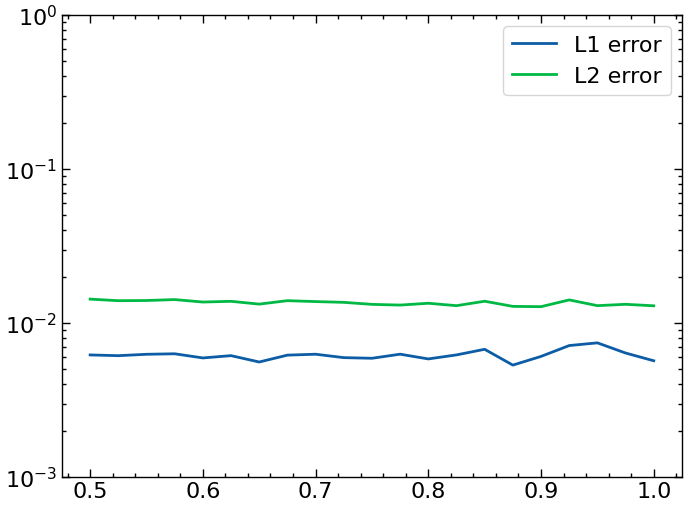

In [9]:
#plt.errorbar(nu_training,nu_loss,label='Loss')
plt.errorbar(nu_training,L1_err,label='L1 error')
plt.errorbar(nu_training,L2_err,label='L2 error')
#plt.errorbar(nu_training,Cor_err,label='Cor error')
plt.legend(frameon=True)
plt.ylim(1e-3,1)
plt.yscale('log')

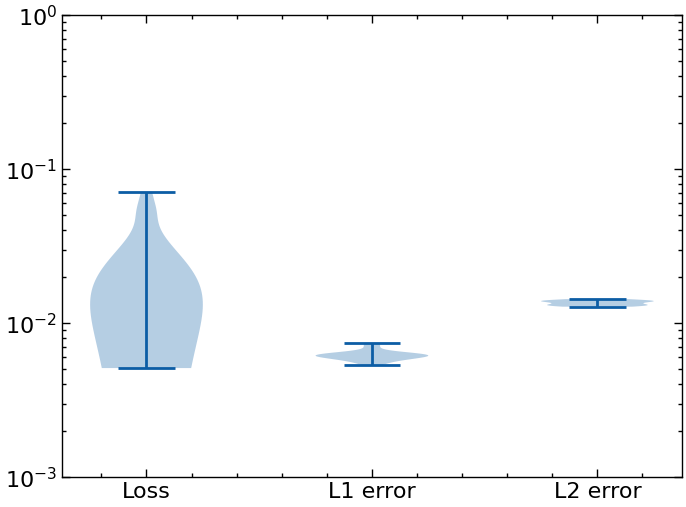

In [10]:
plt.violinplot([nu_loss, L1_err, L2_err])
plt.xticks([1, 2, 3], ['Loss', 'L1 error', 'L2 error'])
plt.ylim(1e-3,1)
plt.yscale('log')

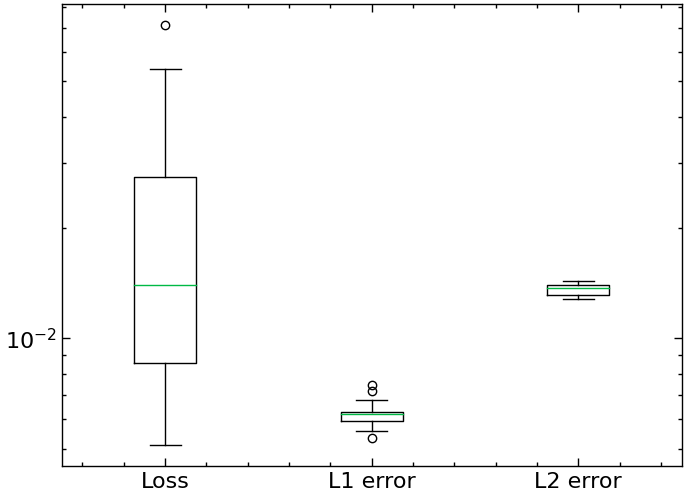

In [11]:
plt.boxplot([nu_loss, L1_err, L2_err], labels=['Loss', 'L1 error', 'L2 error'])
plt.yscale('log')